## 各種ライブラリをインポート

In [46]:
import numpy as np
# from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import random
import math

In [47]:
# データをロード
training_acc = np.array(np.loadtxt('data/training_acc.txt', dtype='float64'))
training_dis = np.array(np.loadtxt('data/training_dis.txt', dtype='float64'))

print(training_acc.shape)
print(training_acc)
print(training_dis.shape)
print(training_dis)

(800, 90)
[[ 0.     0.134  0.089 ...  2.405  3.608 -7.84 ]
 [ 2.405  3.564 -7.885 ...  2.405  3.653 -7.751]
 [ 2.45   3.608 -7.795 ...  2.45   3.564 -7.662]
 ...
 [-0.178  2.005 -1.47  ...  0.089  1.425  0.668]
 [ 0.045  1.114  0.98  ...  0.223  0.134  1.559]
 [ 0.445  0.045  1.737 ... -0.356  1.559  0.223]]
(800,)
[0.  2.9 4.4 2.1 2.2 1.9 2.3 3.6 0.  2.6 2.4 2.3 2.  3.2 1.6 2.8 2.2 4.5
 5.  1.6 1.9 1.4 2.3 1.1 1.1 2.  2.5 3.  1.  0.  0.2 0.7 1.1 2.  2.8 1.9
 3.9 2.6 2.5 0.5 1.2 2.  3.  1.9 1.8 1.6 0.2 0.  0.  2.2 2.4 1.  2.  3.
 1.7 2.5 1.4 1.4 2.6 2.  2.8 2.8 2.2 4.8 0.  2.1 0.  1.  2.6 2.4 2.1 2.
 2.8 2.7 1.5 1.9 1.3 3.  2.9 2.3 2.4 2.5 0.  0.1 1.2 4.  4.  1.9 2.  1.8
 3.1 1.5 0.  2.8 2.1 2.5 1.2 1.5 1.5 2.3 2.2 0.  0.  3.3 1.7 0.  0.6 0.9
 1.8 1.  1.1 1.5 1.3 1.  1.2 1.1 1.4 1.9 1.  1.6 1.6 2.2 1.8 2.  2.4 2.7
 2.1 3.9 4.2 4.9 3.8 3.2 3.1 1.2 2.2 2.7 1.3 1.6 1.  0.2 1.  1.9 2.2 3.4
 2.3 0.8 1.1 1.6 3.8 1.7 1.1 2.6 3.4 0.8 1.  3.4 3.6 1.1 1.3 2.3 2.4 0.6
 0.  0.  0.  0.  2.4 3.1 0. 

## 活性化関数の定義
### sigmoid, softmax, tanh関数とそれらの微分を宣言している。

In [48]:
# sigmoid function
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

# derivative of sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# derivative of softmax function
def softmax_prime(x):
    return softmax(x) * (1 - softmax(x))

# tanh function
def tanh(x):
  return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))

def tanh_prime(x):
  return 4 / (np.exp(x)+np.exp(-x))**2

## Layerの定義
### 初期層、中間層、出力層でクラスが分けられているが全てにおいて、<br>layer = *_layer(入力次元数, 出力次元数, 学習率（指定しないと0.03）)のように宣言する。<br>逆伝播、順伝播の場合はそれぞれlayer.forward(...)、layer.backward(...)のようにする。

In [49]:
# ######################################最初の層についてのクラス###########################################
# class start_layer(object):
#     # initation
#     def  __init__(self, input_dim, output_dim, learning_rate=0.03):
#         self.input_dim = input_dim # 入力次元
#         self.output_dim = output_dim #出力次元
#         self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
#         self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float64) #重みを決定
#         self.bias = np.zeros((1, output_dim), dtype=np.float64) #バイアス項
        
#     # 順伝播
#     def forward(self,x):
#         # x_h ... input_dim次元の(縦)ベクトル
#         self.input_x = np.array(x).reshape(self.input_dim)
        
#         # u_i ... output_dim次元の(縦)ベクトルを出力
#         self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim) 
        
#         # x_i ... output_dim次元の(縦)ベクトルを出力 (sigmoidを作用させる)
#         self.output_x = sigmoid(self.output_u).reshape(self.output_dim)
        
#         # u_i が 出力
#         return self.output_u
    
#     # 逆伝播
#     def backward(self,delta):# delta = δ_i
#         # W = W - η .* (δ_i * x_h.T) ... (output_dim　×　nput_dim)次元の配列
#         self.weight = self.weight - self.learning_rate * np.dot(delta.reshape(self.output_dim,1), self.input_x.reshape(1, self.input_dim))
#         return
#  #################################################################################################


# ######################################  中間層についてのクラス  ###########################################
# class mid_layer(object):
#     # initation
#     def  __init__(self, input_dim, output_dim, learning_rate=0.03):
#         self.input_dim = input_dim # 入力次元
#         self.output_dim = output_dim #出力次元
#         self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
#         self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float64) #重みを決定
#         self.bias = np.zeros((1, output_dim), dtype=np.float64) #バイアス項
        
#     # 順伝播   
#     def forward(self,u):# u = u_i
        
#         # u_i ... input_dim次元の(縦)ベクトル
#         self.input_u = np.array(u).reshape(self.input_dim)
        
#         # x_i ... input_dim次元の(縦)ベクトル
#         self.input_x = sigmoid(self.input_u).reshape(self.input_dim) 
        
#         # u_j ... output_dim次元の(縦)ベクトルを出力
#         self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim)
        
#         # x_j ... output_dim次元の(縦)ベクトルを出力
#         self.output_x = sigmoid(self.output_u).reshape(self.output_dim)
        
#         # u_j が 出力
#         return self.output_u
    
#     # 逆伝播
#     def backward(self, delta):# delta = δ_j
        
#         # W = W - η .* (δ_j * x_i.T) ... (output_dim　×　nput_dim)次元の配列
#         self.weight = self.weight - self.learning_rate * np.dot(delta.reshape(self.output_dim,1), self.input_x.reshape(1, self.input_dim))
        
#         # δ_i = (W_ji.T *  δ_j) .* f'(u_i) ... input_dim次元の(縦)ベクトル
#         return (np.dot(self.weight.T, delta) * sigmoid_prime(self.input_u)).reshape(self.input_dim)
# #################################################################################################

    
# ######################################  中間層についてのクラス  ###########################################    
# class last_layer(object):
    
#     def  __init__(self, input_dim, output_dim, learning_rate=0.03):
#         self.input_dim = input_dim # 入力次元
#         self.output_dim = output_dim#出力次元
#         self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
#         self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float64) #重みを決定
#         self.bias = np.zeros((1, output_dim), dtype=np.float64) #バイアス項
        
#     # 順伝播    
#     def forward(self,u):# u = u_j
        
#         # u_j ... input_dim次元の(縦)ベクトル
#         self.input_u = np.array(u).reshape(self.input_dim) 
        
#         # x_j ... input_dim次元の(縦)ベクトル
#         self.input_x = sigmoid(self.input_u).reshape(self.input_dim)
        
#         # u_k ... output_dim次元の(縦)ベクトルを出力
#         self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim)
        
#         # x_k ... output_dim次元の(縦)ベクトルを出力
#         self.output_x = softmax(self.output_u).reshape(self.output_dim)
        
#         # x_k が最終結果
#         return self.output_x
    
#     # 逆伝播
#     def backward(self,loss):# loss = y - y^p
        
#         # δ_k = loss * f'(u_k) ... output_dim次元の(縦)ベクトルを出力
#         self.delta = (loss * softmax_prime(self.output_u)).reshape(self.output_dim)
        
#         # W = W - η .* (δ_k * x_j.T) ... (output_dim　×　nput_dim)次元の配列
#         self.weight = self.weight - self.learning_rate * np.dot(self.delta.reshape(self.output_dim,1), self.input_x.reshape(1,self.input_dim))
#         #print("gradient = {}".format(np.dot(self.delta.reshape(self.output_dim,1), self.input_x.reshape(1,self.input_dim))))
        
#         #  δ_j = (W_kj.T *  δ_k) .* f'(u_j) ... input_dim次元の(縦)ベクトル
#         return ( np.dot(self.weight.T, self.delta) * sigmoid_prime(self.input_u) ).reshape(self.input_dim)
# #################################################################################################

######################################最初の層についてのクラス###########################################
class start_layer(object):
    # initation
    def  __init__(self, input_dim, output_dim, learning_rate=0.03):
        self.input_dim = input_dim # 入力次元
        self.output_dim = output_dim #出力次元
        self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
        self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float32) #重みを決定
        self.bias = np.zeros((1, output_dim), dtype=np.float32) #バイアス項
        
    # 順伝播
    def forward(self,x):
        # x_h ... input_dim次元の(縦)ベクトル
        self.input_x = np.array(x).reshape(self.input_dim)
        
        # u_i ... output_dim次元の(縦)ベクトルを出力
        self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim) 
        
        # x_i ... output_dim次元の(縦)ベクトルを出力 (sigmoidを作用させる)
        self.output_x = sigmoid(self.output_u).reshape(self.output_dim)
        
        # u_i が 出力
        return self.output_u
    
    # 逆伝播
    def backward(self,delta):# delta = δ_i
        # W = W - η .* (δ_i * x_h.T) ... (output_dim　×　nput_dim)次元の配列
        self.weight = self.weight - self.learning_rate * np.dot(delta.reshape(self.output_dim,1), self.input_x.reshape(1, self.input_dim))
        return
 #################################################################################################


######################################  中間層についてのクラス  ###########################################
class mid_layer(object):
    # initation
    def  __init__(self, input_dim, output_dim, learning_rate=0.03):
        self.input_dim = input_dim # 入力次元
        self.output_dim = output_dim #出力次元
        self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
        self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float32) #重みを決定
        self.bias = np.zeros((1, output_dim), dtype=np.float32) #バイアス項
        
    # 順伝播   
    def forward(self,u):# u = u_i
        
        # u_i ... input_dim次元の(縦)ベクトル
        self.input_u = np.array(u).reshape(self.input_dim)
        
        # x_i ... input_dim次元の(縦)ベクトル
        self.input_x = sigmoid(self.input_u).reshape(self.input_dim) 
        
        # u_j ... output_dim次元の(縦)ベクトルを出力
        self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim)
        
        # x_j ... output_dim次元の(縦)ベクトルを出力
        self.output_x = sigmoid(self.output_u).reshape(self.output_dim)
        
        # u_j が 出力
        return self.output_u
    
    # 逆伝播
    def backward(self, delta):# delta = δ_j
        
        # W = W - η .* (δ_j * x_i.T) ... (output_dim　×　nput_dim)次元の配列
        self.weight = self.weight - self.learning_rate * np.dot(delta.reshape(self.output_dim,1), self.input_x.reshape(1, self.input_dim))
        
        # δ_i = (W_ji.T *  δ_j) .* f'(u_i) ... input_dim次元の(縦)ベクトル
        return (np.dot(self.weight.T, delta) * sigmoid_prime(self.input_u)).reshape(self.input_dim)
#################################################################################################

    
######################################  中間層についてのクラス  ###########################################    
class last_layer(object):
    
    def  __init__(self, input_dim, output_dim, learning_rate=0.03):
        self.input_dim = input_dim # 入力次元
        self.output_dim = output_dim#出力次元
        self.learning_rate = learning_rate #学習率(0.005 ~ 0.1)
        self.weight = np.random.normal(np.sqrt(1.0/input_dim), size=(output_dim, input_dim)).astype(np.float32) #重みを決定
        self.bias = np.zeros((1, output_dim), dtype=np.float32) #バイアス項
        
    # 順伝播    
    def forward(self,u):# u = u_j
        
        # u_j ... input_dim次元の(縦)ベクトル
        self.input_u = np.array(u).reshape(self.input_dim) 
        
        # x_j ... input_dim次元の(縦)ベクトル
        self.input_x = sigmoid(self.input_u).reshape(self.input_dim)
        
        # u_k ... output_dim次元の(縦)ベクトルを出力
        self.output_u = (np.dot(self.weight, self.input_x)).reshape(self.output_dim)
        
        # x_k ... output_dim次元の(縦)ベクトルを出力
        self.output_x = sigmoid(self.output_u).reshape(self.output_dim)
        
        # x_k が最終結果
        return self.output_x
    
    # 逆伝播
    def backward(self,loss):# loss = y - y^p
        
        # δ_k = loss * f'(u_k) ... output_dim次元の(縦)ベクトルを出力
        self.delta = (loss * sigmoid_prime(self.output_u)).reshape(self.output_dim)
        
        # W = W - η .* (δ_k * x_j.T) ... (output_dim　×　nput_dim)次元の配列
        self.weight = self.weight - self.learning_rate * np.dot(self.delta.reshape(self.output_dim,1), self.input_x.reshape(1,self.input_dim))
        #print("gradient = {}".format(np.dot(self.delta.reshape(self.output_dim,1), self.input_x.reshape(1,self.input_dim))))
        
        #  δ_j = (W_kj.T *  δ_k) .* f'(u_j) ... input_dim次元の(縦)ベクトル
        return ( np.dot(self.weight.T, self.delta) * sigmoid_prime(self.input_u) ).reshape(self.input_dim)
#################################################################################################

## 3層用ニューラルネットの定義

In [87]:
def nn_3(first_layer=90, second_layer=60, third_layer=1, learning_rate=0.01, epoch_number=250, train_number=500, test_number = 30):
    lay_1 = start_layer(first_layer, second_layer, learning_rate)
    lay_2 = last_layer(second_layer, third_layer, learning_rate)

    np.set_printoptions(precision=3)
    accuracy_list = []
    epoch_list = []
    loop = 0
    epoch_number = epoch_number#200
    train_number = train_number#500
    test_number = test_number#100

    for epoch in range(0,epoch_number): 
        for i in range(0,train_number):
            random_train_index = random.randint(0,training_acc.shape[0]-51)
            #順伝播
            output = lay_1.forward(training_acc[random_train_index].reshape(first_layer))
            output = lay_2.forward(output)

            #逆伝播
            correct_answer = training_dis[random_train_index]
            loss = output - correct_answer/5
            delta = lay_2.backward(loss)
            delta = lay_1.backward(delta)

        #テストデータで正答率をチェック
        count = 0
        for j in range(0,test_number):
            random_test_index = random.randint(0,50)+training_acc.shape[0]-51
            output = lay_1.forward(training_acc[random_test_index].reshape(first_layer))
            output = lay_2.forward(output)
    
            #print("output = {}".format(output))
            #print("prediction = {} <---> test_labels = {}.".format(np.argmax(output), test_labels[random_test_index]))

            count += float(training_dis[random_test_index] - 5 * output)

        loop += 1
        #print("#",end="")
        print("\t{:2.0f} / {} finished.  accuracy = {:2.5f}".format(loop, epoch_number, count/test_number))
        epoch_list.append(epoch)
        accuracy_list.append(count/test_number)

    print("\t finished")
    return epoch_list, accuracy_list, lay_1, lay_2

	 1 / 250 finished.  accuracy = -2.97687
	 2 / 250 finished.  accuracy = -2.11627
	 3 / 250 finished.  accuracy = -0.88102
	 4 / 250 finished.  accuracy = -0.22666
	 5 / 250 finished.  accuracy = 0.02917
	 6 / 250 finished.  accuracy = 0.32656
	 7 / 250 finished.  accuracy = 0.38922
	 8 / 250 finished.  accuracy = 0.89709
	 9 / 250 finished.  accuracy = 0.53975
	10 / 250 finished.  accuracy = 0.96882
	11 / 250 finished.  accuracy = 0.92845
	12 / 250 finished.  accuracy = 0.85628
	13 / 250 finished.  accuracy = 1.02847
	14 / 250 finished.  accuracy = 0.96436
	15 / 250 finished.  accuracy = 1.11585
	16 / 250 finished.  accuracy = 0.97148
	17 / 250 finished.  accuracy = 1.01732
	18 / 250 finished.  accuracy = 0.85181
	19 / 250 finished.  accuracy = 1.05696
	20 / 250 finished.  accuracy = 1.31989
	21 / 250 finished.  accuracy = 1.21695
	22 / 250 finished.  accuracy = 0.93003
	23 / 250 finished.  accuracy = 1.23059
	24 / 250 finished.  accuracy = 0.90275
	25 / 250 finished.  accuracy = 0.87

	206 / 250 finished.  accuracy = 0.34218
	207 / 250 finished.  accuracy = -0.08457
	208 / 250 finished.  accuracy = 0.22511
	209 / 250 finished.  accuracy = 0.27888
	210 / 250 finished.  accuracy = -0.04107
	211 / 250 finished.  accuracy = 0.36557
	212 / 250 finished.  accuracy = 0.28137
	213 / 250 finished.  accuracy = 0.39072
	214 / 250 finished.  accuracy = 0.28919
	215 / 250 finished.  accuracy = 0.57846
	216 / 250 finished.  accuracy = 0.25505
	217 / 250 finished.  accuracy = 0.30190
	218 / 250 finished.  accuracy = 0.37921
	219 / 250 finished.  accuracy = 0.29616
	220 / 250 finished.  accuracy = 0.31185
	221 / 250 finished.  accuracy = 0.40914
	222 / 250 finished.  accuracy = 0.14967
	223 / 250 finished.  accuracy = 0.13425
	224 / 250 finished.  accuracy = 0.22461
	225 / 250 finished.  accuracy = 0.01689
	226 / 250 finished.  accuracy = -0.04731
	227 / 250 finished.  accuracy = 0.09841
	228 / 250 finished.  accuracy = 0.13325
	229 / 250 finished.  accuracy = 0.13820
	230 / 250 fi

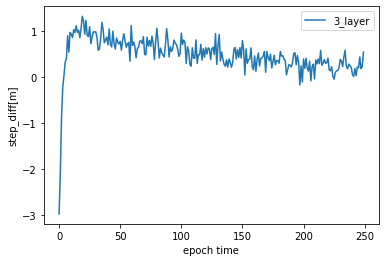

In [85]:
epoch, step_diff, lay1, lay2= nn_3()

plt.plot(epoch, step_diff,label="3_layer")

plt.xlabel("epoch time")
plt.ylabel("step_diff[m]")
plt.legend()
plt.show()
#plt.savefig("../report/5-2-1.png")

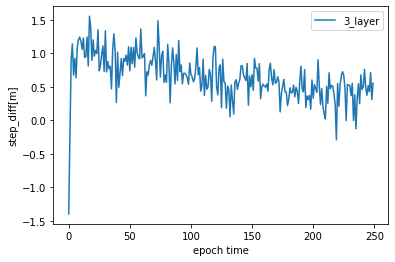

In [76]:
plt.plot(epoch, step_diff,label="3_layer")

plt.xlabel("epoch time")
plt.ylabel("step_diff[m]")
plt.legend()
plt.show()
#plt.savefig("../report/5-2-1.png")

In [45]:
#保存
np.savetxt("data/w1.txt",lay1.weight, delimiter=' ', fmt='%f')
np.savetxt("data/w2.txt",lay2.weight, delimiter=' ', fmt='%f')

In [11]:
w = np.array(np.loadtxt('data/w1.txt', dtype='float32'))

print("w = \n", w)
print("\nlay1.weight = \n",lay1.weight)
print("\nw == lay.weight ?\n",w==lay1.weight)

if np.all(w==lay1.weight):
  print("\nYEAH")
else:
  print("\nOh, my Gosh")

w = 
 [[ 0.958  2.809  2.132 ... -0.407 -0.403  0.441]
 [-1.189 -0.215  0.705 ... -0.06   1.9    1.25 ]
 [ 0.05  -0.515 -0.323 ... -0.397  1.057 -0.827]
 ...
 [ 0.472  1.845 -0.76  ... -2.548 -0.932 -0.132]
 [-0.408  0.292 -0.824 ...  1.079 -0.395  1.938]
 [-1.346 -0.618  1.12  ... -0.547 -0.83  -0.254]]

lay1.weight = 
 [[ 0.958  2.809  2.132 ... -0.407 -0.403  0.441]
 [-1.189 -0.215  0.705 ... -0.06   1.9    1.25 ]
 [ 0.05  -0.515 -0.323 ... -0.397  1.057 -0.827]
 ...
 [ 0.472  1.845 -0.76  ... -2.548 -0.932 -0.132]
 [-0.408  0.292 -0.824 ...  1.079 -0.395  1.938]
 [-1.346 -0.618  1.12  ... -0.547 -0.83  -0.254]]

w == lay.weight ?
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]

Oh, my Gosh


In [12]:
acc_array = np.zeros(90)
output = lay1.forward(acc_array.reshape(90))
output = lay2.forward(output)
print("output = ",float(output))

output =  0.22790461094191056
